In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//Circe para trabajar con JSON
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._


//Sttp para realizar request
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._
import sttp.client.basicRequest

//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
    .master("local[*]")
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._


//Sttp para realizar request

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._

import sttp.client.basicRequest

//For adding extra dependenies

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@4517fd72
import spark.implicits._

In [2]:
//Crear URL
def createUri(category: String, widget: String, start_date: String, end_date: String, time_trunc: String, lang: String, 
              geo_trunc: String = "", geo_limit: String = "", geo_ids: String = ""): String = {
  val baseUrl = s"https://apidatos.ree.es/$lang/datos/$category/$widget"
  
  // Crear un mapa con los parámetros obligatorios y opcionales
  val params = Map(
    "start_date" -> start_date,
    "end_date" -> end_date,
    "time_trunc" -> time_trunc,
    "geo_trunc" -> geo_trunc,
    "geo_limit" -> geo_limit,
    "geo_ids" -> geo_ids
  ).filter { case (_, v) => v.nonEmpty } // Filtrar los parámetros que no están vacíos

  //Especifico el orden concreto de los paramtros ya que, Scala map no te garantiza el orden
  val orderedKeys = Seq("start_date", "end_date", "time_trunc", "geo_trunc", "geo_limit", "geo_ids")

  // Unir los parámetros en una cadena
  val queryString = orderedKeys.flatMap(key => params.get(key).map(value => s"$key=$value")).mkString("&")
  
  s"$baseUrl?$queryString"
}


//Lanzar llamada y obtener guardar datos
def getDataApi(apiUrl: String): Either[String, String] = {
 
    val newRequest = basicRequest.get(uri"$apiUrl")
    val response = newRequest.send()
  
  response.body match {
    case Right(body) => 
      Right(body)
      
    case Left(error) => 
      Left(s"Error fetching data: $error")
  }
}

// Transformar response a DataFrame
def responseToDF(response: Either[String, String]): DataFrame = {
    response match {
    case Right(body) => 
        val rdd = spark.sparkContext.parallelize(Seq(body))
        spark.read.json(rdd)
    case Left(error) => 
        println(error)
        spark.emptyDataFrame
    }
}


defined function createUri
defined function getDataApi
defined function responseToDF

In [3]:
val category = "demanda"
val widget = "demanda-tiempo-real"
val start_date = "2024-05-01T00:00"
val end_date = "2024-05-31T23:59"
val time_trunc = "hour"
val lang = "es"
val geo_trunc = "electric_system"
val geo_limit = "ccaa"
val geo_ids = "13"
val uriMayo = createUri(category, widget,"2024-05-01T00:00", "2024-05-31T23:59", time_trunc, lang)
val uriEnero = createUri(category, widget, "2024-01-01T00:00", "2024-01-31T23:59", time_trunc, lang)

category: String = "demanda"
widget: String = "demanda-tiempo-real"
start_date: String = "2024-05-01T00:00"
end_date: String = "2024-05-31T23:59"
time_trunc: String = "hour"
lang: String = "es"
geo_trunc: String = "electric_system"
geo_limit: String = "ccaa"
geo_ids: String = "13"
uriMayo: String = "https://apidatos.ree.es/es/datos/demanda/demanda-tiempo-real?start_date=2024-05-01T00:00&end_date=2024-05-31T23:59&time_trunc=hour"
uriEnero: String = "https://apidatos.ree.es/es/datos/demanda/demanda-tiempo-real?start_date=2024-01-01T00:00&end_date=2024-01-31T23:59&time_trunc=hour"

In [5]:
val dfDemandaHorasMayo = responseToDF(getDataApi(uriMayo))
val dfDemandaHorasEnero = responseToDF(getDataApi(uriEnero))

json at cmd1.sc:45

8 / 8

json at cmd1.sc:45

8 / 8

dfDemandaHorasMayo: DataFrame = [data: struct<attributes: struct<description: string, last-update: string ... 1 more field>, id: string ... 2 more fields>, included: array<struct<attributes:struct<color:string,composite:boolean,description:string,last-update:string,magnitude:string,title:string,type:string,values:array<struct<datetime:string,percentage:double,value:bigint>>>,groupId:string,id:string,type:string>>]
dfDemandaHorasEnero: DataFrame = [data: struct<attributes: struct<description: string, last-update: string ... 1 more field>, id: string ... 2 more fields>, included: array<struct<attributes:struct<color:string,composite:boolean,description:string,last-update:string,magnitude:string,title:string,type:string,values:array<struct<datetime:string,percentage:double,value:bigint>>>,groupId:string,id:string,type:string>>]

In [6]:
val dfExcludeEnero = dfDemandaHorasEnero
    .withColumn("includedData",explode($"included"))
    .withColumn("valores", explode($"includedData.attributes.values"))
    .select(
        $"includedData.type".as("TipoDemanda"),
        $"valores.*"
    ) 
val dfExcludeMayo = dfDemandaHorasMayo
    .withColumn("includedData",explode($"included"))
    .withColumn("valores", explode($"includedData.attributes.values"))
    .select(
        $"includedData.type".as("TipoDemanda"),
        $"valores.*"
    ) 

val dfTransformEnero = dfExcludeEnero.withColumn("timestamp", to_timestamp($"datetime", "yyyy-MM-dd'T'HH:mm:ss.SSSXXX"))
    .withColumn("day", date_format($"datetime", "yyyy-MM-dd")) //Creamos la columna day
    .withColumn("hour", date_format($"datetime", "HH:mm:ss")) //Creamos la columna hour
    .drop("datetime") //borramos columna datetime
    .groupBy("hour")
    .agg(mean("value").alias("meanValue"))
    .orderBy("hour")

val dfTransformMayo = dfExcludeMayo.withColumn("timestamp", to_timestamp($"datetime", "yyyy-MM-dd'T'HH:mm:ss.SSSXXX"))
    .withColumn("day", date_format($"datetime", "yyyy-MM-dd")) //Creamos la columna day
    .withColumn("hour", date_format($"datetime", "HH:mm:ss")) //Creamos la columna hour
    .drop("datetime") //borramos columna datetime
    .groupBy("hour")
    .agg(mean("value").alias("meanValue"))
    .orderBy("hour")


dfExcludeEnero: DataFrame = [TipoDemanda: string, datetime: string ... 2 more fields]
dfExcludeMayo: DataFrame = [TipoDemanda: string, datetime: string ... 2 more fields]
dfTransformEnero: Dataset[Row] = [hour: string, meanValue: double]
dfTransformMayo: Dataset[Row] = [hour: string, meanValue: double]

collect at cmd6.sc:1

8 / 8

collect at cmd6.sc:1

200 / 200

collect at cmd6.sc:1

200 / 200

collect at cmd6.sc:1

200 / 200

collect at cmd6.sc:2

8 / 8

collect at cmd6.sc:2

200 / 200

collect at cmd6.sc:2

200 / 200

collect at cmd6.sc:2

200 / 200

collect at cmd6.sc:3

8 / 8

collect at cmd6.sc:3

200 / 200

collect at cmd6.sc:3

200 / 200

collect at cmd6.sc:3

200 / 200

collect at cmd6.sc:4

8 / 8

collect at cmd6.sc:4

200 / 200

collect at cmd6.sc:4

200 / 200

collect at cmd6.sc:4

200 / 200

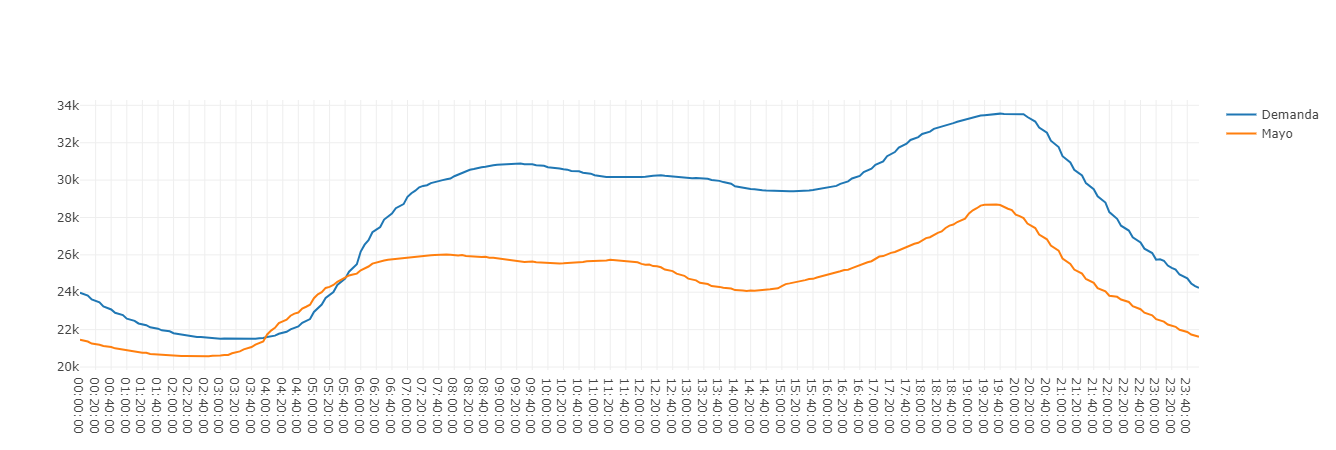

horasEnero: Seq[String] = WrappedArray(
  "00:00:00",
  "00:05:00",
  "00:10:00",
  "00:15:00",
  "00:20:00",
  "00:25:00",
  "00:30:00",
  "00:35:00",
  "00:40:00",
  "00:45:00",
  "00:50:00",
  "00:55:00",
  "01:00:00",
  "01:05:00",
  "01:10:00",
  "01:15:00",
  "01:20:00",
  "01:25:00",
  "01:30:00",
  "01:35:00",
  "01:40:00",
  "01:45:00",
  "01:50:00",
  "01:55:00",
  "02:00:00",
  "02:05:00",
  "02:10:00",
  "02:15:00",
  "02:20:00",
  "02:25:00",
  "02:30:00",
  "02:35:00",
  "02:40:00",
  "02:45:00",
  "02:50:00",
  "02:55:00",
  "03:00:00",
  "03:05:00",
...
horasMayo: Seq[String] = WrappedArray(
  "00:00:00",
  "00:05:00",
  "00:10:00",
  "00:15:00",
  "00:20:00",
  "00:25:00",
  "00:30:00",
  "00:35:00",
  "00:40:00",
  "00:45:00",
  "00:50:00",
  "00:55:00",
  "01:00:00",
  "01:05:00",
  "01:10:00",
  "01:15:00",
  "01:20:00",
  "01:25:00",
  "01:30:00",
  "01:35:00",
  "01:40:00",
  "01:45:00",
  "01:50:00",
  "01:55:00",
  "02:00:00",
  "02:05:00",
  "02:10:00",
  "02:1

In [7]:
// Convertir DataFrame a listas
val horasEnero = dfTransformEnero.select($"hour").as[String].collect().toSeq
val horasMayo = dfTransformMayo.select($"hour").as[String].collect().toSeq
val meanValuesEnero = dfTransformEnero.select($"meanValue").as[Double].collect().toSeq
val meanValuesMayo = dfTransformMayo.select($"meanValue").as[Double].collect().toSeq

// Crear el gráfico
val DemandaEnero = Scatter(
    horasEnero,
    meanValuesEnero,
    name = "Demanda"
)
val DemandaMayo = Scatter(
    horasMayo,
    meanValuesMayo,
    name = "Mayo"
)
val data = Seq(DemandaEnero, DemandaMayo)
plot(data)

collect at cmd11.sc:13

8 / 8

collect at cmd11.sc:13

200 / 200

collect at cmd11.sc:13

200 / 200

collect at cmd11.sc:13

24 / 24

collect at cmd11.sc:14

8 / 8

collect at cmd11.sc:14

200 / 200

collect at cmd11.sc:14

200 / 200

collect at cmd11.sc:14

24 / 24

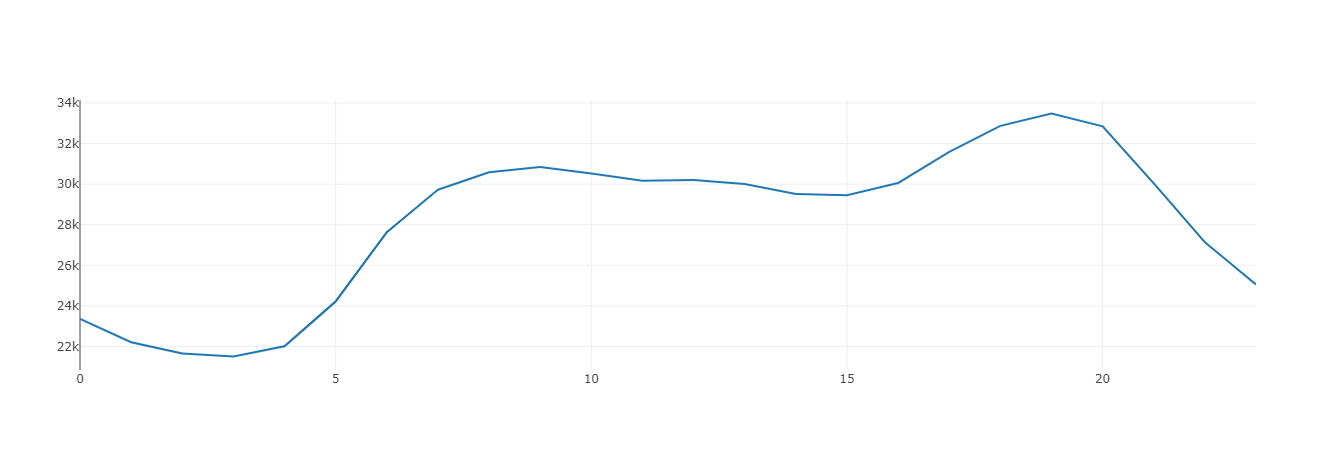

dfGroupByHours: Dataset[Row] = [hour: int, mean_value: double]
seqHour: Seq[String] = WrappedArray(
  "0",
  "1",
  "2",
  "3",
  "4",
  "5",
  "6",
  "7",
  "8",
  "9",
  "10",
  "11",
  "12",
  "13",
  "14",
  "15",
  "16",
  "17",
  "18",
  "19",
  "20",
  "21",
  "22",
  "23"
)
seqMeanValues: Seq[Double] = WrappedArray(
  23357.413082437277,
  22210.18189964158,
  21648.757168458782,
  21504.870967741936,
  22007.694444444445,
  24218.033154121862,
  27629.082437275985,
  29723.677419354837,
  30582.190860215054,
  30841.79659498208,
  30529.70519713262,
  30169.927419354837,
  30209.8064516129,
  30010.582437275985,
  29514.717741935485,
  29453.551971326164,
  30053.79211469534,
  31593.39336917563,
  32874.13172043011,
  33482.908602150535,
  32847.831541218635,
  30037.772401433693,
  27137.620967741936,
  25059.09229390681
)
Demanda: Scatter = Scatter(
  Some(
    Strings(
      WrappedArray(
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
       

In [12]:
val dfGroupByHours = dfDemandaHorasEnero
    .withColumn("includedData", explode($"included"))
    .withColumn("valores", explode($"includedData.attributes.values"))
    .select(
        $"includedData.type".as("TipoDemanda"),
        $"valores.datetime",
        $"valores.value"
    )
    .groupBy(hour($"datetime").alias("hour"))
    .agg(mean("value").alias("mean_value"))
    .orderBy("hour")

val seqHour = dfGroupByHours.select("hour").as[String].collect.toSeq
val seqMeanValues = dfGroupByHours.select("mean_value").as[Double].collect.toSeq

val Demanda = Scatter(
    seqHour,
    seqMeanValues,
    name = "Demanda"
)
val data = Seq(Demanda)
plot(data)

In [ ]:
val dfGroupByHours = dfExcludeEnero
    .groupBy(hour($"datetime").alias("hour"))
    .agg(mean("value").alias("mean_value"))
    .orderBy("hour")
dfGroupByHours.show()

cmd0.sc:1: not found: value dfExcludeEnero
val dfGroupByHours = dfExcludeEnero
                     ^cmd0.sc:2: not found: value hour
    .groupBy(hour($"datetime").alias("hour"))
             ^cmd0.sc:2: value $ is not a member of StringContext
    .groupBy(hour($"datetime").alias("hour"))
                  ^cmd0.sc:3: not found: value mean
    .agg(mean("value").alias("mean_value"))
         ^Compilation Failed

: 

In [9]:
dfDemandaHorasEnero.printSchema

root
 |-- data: struct (nullable = true)
 |    |-- attributes: struct (nullable = true)
 |    |    |-- description: string (nullable = true)
 |    |    |-- last-update: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-- meta: struct (nullable = true)
 |    |    |-- cache-control: struct (nullable = true)
 |    |    |    |-- cache: string (nullable = true)
 |    |-- type: string (nullable = true)
 |-- included: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attributes: struct (nullable = true)
 |    |    |    |-- color: string (nullable = true)
 |    |    |    |-- composite: boolean (nullable = true)
 |    |    |    |-- description: string (nullable = true)
 |    |    |    |-- last-update: string (nullable = true)
 |    |    |    |-- magnitude: string (nullable = true)
 |    |    |    |-- title: string (nullable = true)
 |    |    |    |-- type: string (nullable = true)
 |    | 